<a href="https://colab.research.google.com/github/ramirojc/Mentoria/blob/master/2_1_TPractico2_ExploracionCuracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduccion, Analisis y Curacion de Datos

## Diplodatos 2020, Mentorias
### Mentor: Ramiro Caro

In [2]:
"""
!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree
!pip install osmnx
!pip install contextily
"""

'\n!pip install geopandas\n!apt install libspatialindex-dev\n!pip install rtree\n!pip install osmnx\n!pip install contextily\n'

## Introduccion, carga de datos

A partir de este punto, utilizaremos los transformadores de distribucion como elemnto de analisis, e incorporaremos datos de consumidores, subestacion y lineas de distribucion.

In [14]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns

from utils import display_markdown

In [4]:
# Editar con el path correspondiente a sus datos
data_path = '../Mentoria/data/SULGIPE_46_2018-12-31_M10_20190611-1750.gdb'

In [5]:
untrd = gpd.read_file(data_path, driver='FileGDB', layer='UNTRD')
untrd = untrd.to_crs(epsg=31984)
untrd.shape, untrd.columns

((10508, 33),
 Index(['COD_ID', 'DIST', 'PAC_1', 'PAC_2', 'PAC_3', 'FAS_CON_P', 'FAS_CON_S',
        'FAS_CON_T', 'SIT_ATIV', 'TIP_UNID', 'POS', 'ATRB_PER', 'TEN_LIN_SE',
        'CAP_ELO', 'CAP_CHA', 'TAP', 'CONF', 'POSTO', 'POT_NOM', 'PER_FER',
        'PER_TOT', 'DAT_CON', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ', 'MUN', 'BANC',
        'TIP_TRAFO', 'MRT', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [6]:
untrs = gpd.read_file(data_path, driver='FileGDB', layer='UNTRS')
untrs.shape, untrs.columns

((17, 53),
 Index(['COD_ID', 'SUB', 'BARR_1', 'BARR_2', 'BARR_3', 'PAC_1', 'PAC_2',
        'PAC_3', 'DIST', 'FAS_CON_P', 'FAS_CON_S', 'FAS_CON_T', 'SIT_ATIV',
        'TIP_UNID', 'POS', 'POT_NOM', 'POT_F01', 'POT_F02', 'PER_FER',
        'PER_TOT', 'BANC', 'DAT_CON', 'CONJ', 'MUN', 'TIP_TRAFO', 'ALOC_PERD',
        'ENES_01', 'ENES_02', 'ENES_03', 'ENES_04', 'ENES_05', 'ENES_06',
        'ENES_07', 'ENES_08', 'ENES_09', 'ENES_10', 'ENES_11', 'ENES_12',
        'ENET_01', 'ENET_02', 'ENET_03', 'ENET_04', 'ENET_05', 'ENET_06',
        'ENET_07', 'ENET_08', 'ENET_09', 'ENET_10', 'ENET_11', 'ENET_12',
        'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [7]:
ssmt = gpd.read_file(data_path, driver='FileGDB', layer='SSDMT')
ssmt.columns, ssmt.columns

(Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

In [8]:
segcon = gpd.read_file(data_path, driver='FileGDB', layer='SEGCON')
segcon.columns, segcon.columns

(Index(['COD_ID', 'DIST', 'GEOM_CAB', 'FORM_CAB', 'MAT_FAS_1', 'MAT_FAS_2',
        'MAT_FAS_3', 'MAT_NEU', 'ISO_FAS_1', 'ISO_FAS_2', 'ISO_FAS_3',
        'ISO_NEU', 'CND_FAS', 'R1', 'X1', 'FTRCNV', 'CNOM', 'CMAX', 'CM_FAS',
        'TUC_FAS', 'A1_FAS', 'A2_FAS', 'A3_FAS', 'A4_FAS', 'A5_FAS', 'A6_FAS',
        'CM_NEU', 'TUC_NEU', 'A1_NEU', 'A2_NEU', 'A3_NEU', 'A4_NEU', 'A5_NEU',
        'A6_NEU', 'DESCR', 'BIT_FAS_1', 'BIT_FAS_2', 'BIT_FAS_3', 'BIT_NEU',
        'geometry'],
       dtype='object'),
 Index(['COD_ID', 'DIST', 'GEOM_CAB', 'FORM_CAB', 'MAT_FAS_1', 'MAT_FAS_2',
        'MAT_FAS_3', 'MAT_NEU', 'ISO_FAS_1', 'ISO_FAS_2', 'ISO_FAS_3',
        'ISO_NEU', 'CND_FAS', 'R1', 'X1', 'FTRCNV', 'CNOM', 'CMAX', 'CM_FAS',
        'TUC_FAS', 'A1_FAS', 'A2_FAS', 'A3_FAS', 'A4_FAS', 'A5_FAS', 'A6_FAS',
        'CM_NEU', 'TUC_NEU', 'A1_NEU', 'A2_NEU', 'A3_NEU', 'A4_NEU', 'A5_NEU',
        'A6_NEU', 'DESCR', 'BIT_FAS_1', 'BIT_FAS_2', 'BIT_FAS_3', 'BIT_NEU',
        'geometry'],
       dtype='

In [9]:
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')
ucbt.columns, ucbt.columns

(Index(['DIST', 'PAC', 'PN_CON', 'UNI_TR_D', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'MUN', 'BRR', 'CEP', 'CLAS_SUB', 'CNAE', 'TIP_CC', 'FAS_CON', 'GRU_TEN',
        'TEN_FORN', 'GRU_TAR', 'SIT_ATIV', 'DAT_CON', 'CAR_INST', 'LIV',
        'ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07',
        'ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12', 'DIC', 'FIC',
        'SEMRED', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'),
 Index(['DIST', 'PAC', 'PN_CON', 'UNI_TR_D', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'MUN', 'BRR', 'CEP', 'CLAS_SUB', 'CNAE', 'TIP_CC', 'FAS_CON', 'GRU_TEN',
        'TEN_FORN', 'GRU_TAR', 'SIT_ATIV', 'DAT_CON', 'CAR_INST', 'LIV',
        'ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07',
        'ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12', 'DIC', 'FIC',
        'SEMRED', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

## Información sobre consumidores

1 - En base a los resultados obtenidos en el practico 1. Defina que informacion sobre consumidores, es la mas relevante para la estimacion de calidad de servicio.

La información que creo es más relevante involucra:
* Ubicación geográfica del consumidor, ya que la calidad varía de acuerdo a si la zona es urbana o rural (variables CONJ, MUN, BRR, CEP, ARE_LOC).
* Cantidad de consumo, ya que las unidades que consumen más parecen ser las que más cortes sufren (variables ENE_*).
* Actividad económica realizada por el consumidor, ya que hay algunas actividades que consumen más que otras, y unidades que varían en frecuencia de corte de acuerdo a la actividad económica (variable CNAE).
* Frecuencia y duración de los cortes (variables DIC y FIC).

In [10]:
ene_col_names = ['ENE_{:02}'.format(i) for i in range(1, 13)]
ucbt_relevant_num_col_names = ene_col_names + ['DIC', 'FIC']
ucbt_relevant_col_names = (
    ['UNI_TR_D', 'CONJ', 'MUN', 'BRR', 'CEP', 'ARE_LOC', 'CNAE'] +
    ucbt_relevant_num_col_names
)

2 - Realice el tratamiento de las filas con valores invalidos y outliers, y luego agrupe los datos en base a la variable UNI_TF_D.

¿Qué tan completo está `ucbt`? Veamos proporciones de cantidades de filas sin datos nulos:

In [11]:
total_len = len(ucbt)
len_without_na = len(ucbt.dropna())
prop = len_without_na / total_len
display_markdown('{} / {} = **{:.2%}**'.format(len_without_na, total_len, prop))
"""
if prop < 1.0:
    display_markdown('Valores nulos por columna:')
    missing_values_count = dataframe.isnull().sum()
    for key, value in missing_values_count[missing_values_count > 0].items():
        display_markdown('* **{}** tiene {} valores nulos'.format(key, value))
    print()
""";

148801 / 148801 = **100.00%**

Vemos que el conjunto de datos está completo.

Ahora veamos qué cantidad de valores atípicos hay en `ucbt`:

In [16]:
for col_name in ucbt[ucbt_relevant_num_col_names]:
    value_is_outlier = (
        (ucbt[col_name] - ucbt[col_name].mean()).abs() > 3 * ucbt[col_name].std()
    )
    outliers_len = len(ucbt[col_name][value_is_outlier])
    total_len = len(ucbt[col_name])
    display_markdown('* **{}**: {} / {} = **{:.2%}**'.format(
        col_name,
        outliers_len,
        total_len,
        outliers_len / total_len
    ))

* **ENE_01**: 77 / 148801 = **0.05%**

* **ENE_02**: 99 / 148801 = **0.07%**

* **ENE_03**: 75 / 148801 = **0.05%**

* **ENE_04**: 81 / 148801 = **0.05%**

* **ENE_05**: 75 / 148801 = **0.05%**

* **ENE_06**: 69 / 148801 = **0.05%**

* **ENE_07**: 70 / 148801 = **0.05%**

* **ENE_08**: 69 / 148801 = **0.05%**

* **ENE_09**: 78 / 148801 = **0.05%**

* **ENE_10**: 75 / 148801 = **0.05%**

* **ENE_11**: 90 / 148801 = **0.06%**

* **ENE_12**: 79 / 148801 = **0.05%**

* **DIC**: 2976 / 148801 = **2.00%**

* **FIC**: 1652 / 148801 = **1.11%**

Vemos que hay más valores atípicos en las columnas DIC y FIC. Hagamos gráficos de caja de estas varaibles:

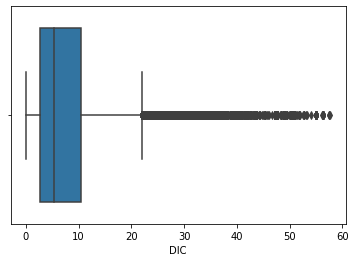

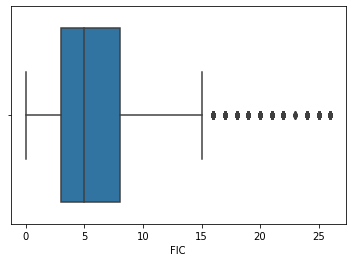

In [17]:
plt.figure()
sns.boxplot(ucbt.DIC)
plt.figure()
sns.boxplot(ucbt.FIC)

¿Qué tal si graficamos las variables sin valores atípicos?

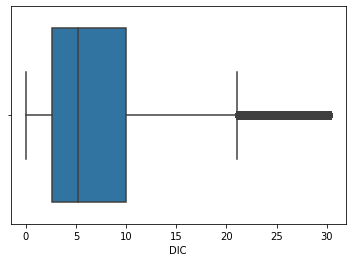

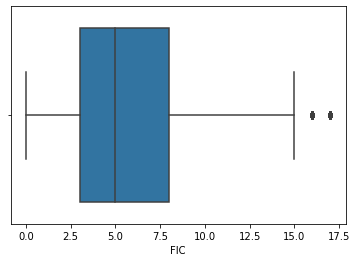

In [18]:
dic_is_outlier = (ucbt.DIC - ucbt.DIC.mean()).abs() > 3 * ucbt.DIC.std()
fic_is_outlier = (ucbt.FIC - ucbt.FIC.mean()).abs() > 3 * ucbt.FIC.std()

plt.figure()
sns.boxplot(ucbt[~dic_is_outlier].DIC)
plt.figure()
sns.boxplot(ucbt[~fic_is_outlier].FIC)

Así se ve mejor.

Eliminemos los consumidores que tengan valores atípicos en DIC o en FIC y quedémonos sólo con las columnas que nos interesan. Además, agrupemos a los consumidores por transformador de distribución:

In [113]:
clean_ucbt = ucbt[~dic_is_outlier & ~fic_is_outlier][ucbt_relevant_col_names]

untrd_from_ucbt = clean_ucbt[['UNI_TR_D'] + ene_col_names].groupby('UNI_TR_D').sum()
untrd_from_ucbt['N_CONS'] = clean_ucbt[['UNI_TR_D']].reset_index().groupby('UNI_TR_D').count()
untrd_from_ucbt['DIC_AVG'] = clean_ucbt[['UNI_TR_D', 'DIC']].groupby('UNI_TR_D').median()
untrd_from_ucbt['FIC_AVG'] = clean_ucbt[['UNI_TR_D', 'FIC']].groupby('UNI_TR_D').median()
untrd_from_ucbt['CNAE_MAIN'] = clean_ucbt[['UNI_TR_D', 'CNAE']].groupby('UNI_TR_D').CNAE.agg(pd.Series.mode)

# pd.merge(untrd, untrd_from_ucbt, left_on='COD_ID', right_on='UNI_TR_D')[['CONJ', 'N_CONS']]

3 - Justifique los metodos utilizados para agrupar las variables numericas y categoricas.

Con respecto a las variables numéricas decido:
* sumar las de consumo de energía (`ENE_*`) para así tener cantidad de energía activa de cada transformador por período,
* sacar medidas de tendencia central tanto para `DIC` como para `FIC` para tener una idea de más o menos cuánto duran los cortes y qué tan frecuentes son en cada transformador, respectivamente. Dadas las formas de las distribuciones de `DIC` y `FIC` (no simétricas, la primera tal vez con forma de Possion y la segunda con forma exponencial o gamma), la medianas me parecen más adecuadas que las medias ya que estas últimas se ven bastante afectadas por valores muy grandes.

Con respecto a las variables categóricas, me quedo sólo con la actividad económica (`CNAE`), para la cual elijo la moda como actividad principal por cada transformador. `CONJ`, `MUN` y `ARE_LOC` no me preocupan por ahora ya que luego puedo obtenerlas haciendo `merge` con `untrd`.

## Informacion sobre subestacion

4 - Analise la informacion disponible sobre los transformadores de segmentacion (UNI_TR_S > UNTRS)

5 - Seleccione las variables relevantes, realize tratamiento de valores invalidos y outliers correspondientes. Agrupe los valores por UNTRD y agregue al dataset.

## Generacion de variables en base a puntos de referencia

5 - Calcule la distancia euclideana de cada untrd al correspondiente untrs y adicione al dataset.

6 - Cree una variable que sea la distancia media a los tres centros urbanos mas cercanos.

7 - Usando OSMnx descargue la informacion sobre caminos dentro del area de cobertura de la distribuidora. Cree variables para las distancias a autopistas (trunk), a caminos primarios (primary) y a caminos secundarios (secondary)


In [ ]:
#Calcule la distancia euclideana de cada untrd al correspondiente untrs y adicione al dataset.
dist_untrs = untrd.distance(untrs.geometry[0])
untrd['dist_untrs'] = dist_untrs

In [ ]:
#Cree una variable que sea la distancia media a los tres centros urbanos mas cercanos.
## tres centros urbanos mas cercas
centro_1 = 'Itabaianinha, Sergipe, Brazil'
centro_2 = 'Tomar do Geru, Sergipe, Brazil'
centro_3 = 'Arauá, Sergipe, Brazil'

In [ ]:
untrd['dist_mar'] = untrd.distance(l_costa)

## Generacion de variables con arboles de busqueda

8 - Cree variables que indique la cantidad de consumidores en radios de 25, 50 y 100 metros del transformador.

9 - Cree una variable indicando la distancia media de cada fila a los 5 untrd mas cercanos.

10 - [Opcional] Usando OSMnx descargue los footprints de edificios disponibles, y cree una variable que indique la cantidad de edificios en un radio de 200 metros al transformador.

In [18]:
from scipy.spatial import cKDTree
import geopandas as gpd

In [19]:
# Cree variables que indique la cantidad de consumidores en radios de 25, 50 y 100 metros del transformador.
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')
ucbt = ucbt.to_crs(epsg=31984)
ucbt.shape, ssmt.columns

((148801, 40),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

In [46]:
# Convertimos las coordenas a una matriz
ucbt_loc_array = [x.coords[0] for x in ucbt.geometry]
untrd_loc_array = [x.coords[0] for x in untrd.geometry]

In [47]:
print(untrd_loc_array[:10])

[(627712.6169779997, 8776098.670127511), (626353.4179798126, 8777498.606078334), (632355.4149737856, 8753247.956105636), (635724.1370160332, 8773322.662057359), (631104.5580278498, 8720058.23505237), (638696.4859638879, 8773991.73208276), (638310.7990282972, 8773035.106081862), (623701.882989638, 8737730.572129583), (638236.557017495, 8772759.907124765), (626993.9699670533, 8775185.16404461)]


In [54]:
radio = 25
radio1 = 50
radio2 = 100
tree = cKDTree(ucbt_loc_array)
near_consumers = tree.query_ball_point(untrd_loc_array, radio)
near_consumers1 = tree.query_ball_point(untrd_loc_array, radio1)
near_consumers2 = tree.query_ball_point(untrd_loc_array, radio2)

In [55]:
print(near_consumers[:10])

[list([100083]) list([104711])
 list([15668, 15669, 15671, 15673, 15674, 15951, 15955, 69473, 69474, 69551, 69553, 122579, 122580])
 list([100959]) list([68479])
 list([100563, 100564, 100719, 100720, 100721, 100722, 110816])
 list([116692, 136261]) list([35337]) list([8748, 91949, 91950]) list([])]


In [51]:
# print("Cantidad de consumidores rurales: ",len(near_consumers_rural))
# print("Cantidad de consumidores intermedios: ",len(near_consumers_intermedio))
# print("Cantidad de consumidores urbanos: ",len(near_consumers_urban))

Cantidad de consumidores rurales:  10508
Cantidad de consumidores intermedios:  10508
Cantidad de consumidores urbanos:  10508


In [64]:
untrd['n_close_con'] = [len(c) for c in near_consumers2]
untrd['is_urb'] =  untrd['n_close_con'] > 50
print(len(untrd[untrd.is_urb == True]))

1201


## Generacion de grafos y calculo de rutas

11 - Usando las tecnicas mostradas en el notebook sobre procesamiento de informacion georeferenciada, construya un grafo basado en la capa de linea de distribicion de media tension:
  - Utilize los puntos de conexion PCON_1 y PCON_2 como nodos, y los segmentos como edges.
  - Adicione COMP y COD_ID como atributos de edge (aristas)
  - Asocie cada transformador untrd con un nodo
  - Asocie cada punto de conexion los circuitos de media tension (CTMT) con la subestacion, a un nodo.

12 - Seleccione al menos 5 metricas de grafo, calcule sus valores para los nodos asociados a cada fila y adicionelos como features al dataset.

13 - [Opcional] Cree convinaciones entre las metricas generando variables adicionales.

14 - Calcule la distancia de cada untrd a su correspondiente punto de conexion con la subestacion, ponderando por COMP (longitud de segmento), utilize el parametro "method" para calcular diferentes tipos de distancias.
Adicione los resultados como variables del dataset.

15 - Calcule la ruta (secuencia de nodos) hasta la conexion con la subestacion, y en base a esta calcule:
 - Resistencia electica total de cada conexion
 - Reactancia electrica de cada conexion.
 [Opcional]
 - Modulo y Angulo de la Impedancia.
 - Corriente Nonimal media a lo largo de la ruta
 - Corriente Maxima media del conductor a lo largo la ruta